In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re

import mglearn
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anaso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\anaso\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
fN = '/Users/anaso/Documents/AA/AA-22-23/Trabalho Final/imdbFull.p'

D = pickle.load(open(fN, 'rb'))

corpus = D.data
y = D.target
yb = [1 if val>5 else 0 for val in y]

print("Tamanho corpus: {} documentos".format(len(corpus)))
print("Shape target: {}".format(y.shape))
print("Classificações Multiclasse: {}".format(np.unique(y)))
print("Classificações Binárias: {}".format(np.unique(yb)))

Tamanho corpus: 50000 documentos
Shape target: (50000,)
Classificações Multiclasse: [ 1  2  3  4  7  8  9 10]
Classificações Binárias: [0 1]


In [3]:
text_train, text_test, y_train, y_test = train_test_split(corpus, yb, train_size=0.5, stratify=yb, random_state=42)

print("Type of corpus: {}".format(type(corpus)))
print("Type of text_train: {}".format(type(text_train)))

print("\nTrain: ")
print("Number of documents in text data (train): {}".format(len(text_train)))
print("Samples per class (train): {}".format(np.bincount(y_train)))

print("\nTest: ")
print("Number of documents in text data (test): {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))

Type of corpus: <class 'list'>
Type of text_train: <class 'list'>

Train: 
Number of documents in text data (train): 25000
Samples per class (train): [12500 12500]

Test: 
Number of documents in text data (test): 25000
Samples per class (test): [12500 12500]


In [4]:
text_train = [critica.replace("<br />", " ") for critica in text_train]
text_train = [re.sub( r'[^a-zA-Z]+', ' ', text.lower()) for text in text_train]

In [5]:
nltk.download('stopwords')
stop_words = set(stopwords.words("english")) 

no_stop_words = [" ".join([(word if word not in (stop_words) else "") for word in critica.split()]) for critica in text_train]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anaso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
cv = CountVectorizer().fit(no_stop_words)
cv_vect = cv.transform(no_stop_words)

In [7]:
stemmer = PorterStemmer()
docs_porter = [" ".join([stemmer.stem(word) for word in critic.split()]) for critic in no_stop_words]
cv_porter = CountVectorizer()
porter_vect = cv_porter.fit_transform(docs_porter)

In [8]:
stemmer = LancasterStemmer()
docs_lancaster = [" ".join([stemmer.stem(word) for word in critic.split()]) for critic in no_stop_words]
cv_lancaster = CountVectorizer()
lancaster_vect = cv_lancaster.fit_transform(docs_lancaster)

In [9]:
stemmer = SnowballStemmer("english")
docs_snowball = [" ".join([stemmer.stem(word) for word in critic.split()]) for critic in no_stop_words]
cv_snowball = CountVectorizer()
snowball_vect = cv_snowball.fit_transform(docs_snowball)

In [10]:
lemma = WordNetLemmatizer()
docs_lemma = [" ".join([lemma.lemmatize(word) for word in critic.split()]) for critic in no_stop_words]
cv_lemma = CountVectorizer()
lemma_vect = cv_lemma.fit_transform(docs_lemma)


In [11]:
print("Tamanho do dicionário: {}".format(cv_vect.shape))

print("Tamanho do dicionário (porter stemmer): {}".format(porter_vect.shape))
print("Tamanho do dicionário (lancaster stemmer): {}".format(lancaster_vect.shape))
print("Tamanho do dicionário (snowball stemmer): {}".format(snowball_vect.shape))

print("Tamanho do dicionário (lemmatization): {}".format(lemma_vect.shape))

# print("CV: ", cv.get_feature_names_out())
# print("\nCV Porter: ", cv_porter.get_feature_names_out())
# print("\nCV Lancaster: ", cv_lancaster.get_feature_names_out())
# print("\nCV Snowball: ", cv_snowball.get_feature_names_out())
# print("\nCV lemma", cv_lemma.get_feature_names_out())

Tamanho do dicionário: (25000, 74794)
Tamanho do dicionário (porter stemmer): (25000, 51286)
Tamanho do dicionário (lancaster stemmer): (25000, 41858)
Tamanho do dicionário (snowball stemmer): (25000, 50650)
Tamanho do dicionário (lemmatization): (25000, 67119)


In [12]:
print("Critica original: \n", text_train[0], " | Palavras: ", len(text_train[0].split()))
print("\nCritica sem stop words: \n", no_stop_words[0], " | Palavras: ", len(no_stop_words[0].split()))
print("\nCritica CountVectorizer: \n", np.array(cv.get_feature_names_out())[:10], " | Palavras: ", len(cv.get_feature_names_out()))

print("\n\n\nTOKENIZAÇÃO")
print("\nCritica Porter Stemmer: \n", docs_porter[0], " | Palavras: ", len(docs_porter[0].split()))
print("\nPrimeiros Tokens Porter Stemmer: \n", np.array(cv_porter.get_feature_names_out())[:10], " | Palavras: ", len(cv_porter.get_feature_names_out()))

print("\nCritica Lancaster Stemmer: \n", docs_lancaster[0], " | Palavras: ", len(docs_lancaster[0].split()))
print("\nPrimeiros Tokens Lancaster Stemmer: \n", np.array(cv_lancaster.get_feature_names_out())[:10], " | Palavras: ", len(cv_lancaster.get_feature_names_out()))

print("\n\n\nCritica Snowball Stemmer: \n", docs_snowball[0], " | Palavras: ", len(docs_snowball[0].split()))
print("\nPrimeiros Tokens Snowball Stemmer: \n", np.array(cv_snowball.get_feature_names_out())[:10], " | Palavras: ", len(cv_snowball.get_feature_names_out()))

print("\n\n\nLEMATIZAÇÃO")
print("\nCritica NetWord Lemmatizer: \n", docs_lemma[0], " | Palavras: ", len(docs_lemma[0].split()))
print("\nPrimeiros Tokens NetWord Lemmatizer: \n", np.array(cv_lemma.get_feature_names_out())[:10], " | Palavras: ", len(cv_lemma.get_feature_names_out()))


Critica original: 
 i found it hard to like anyone in this film the central characters lindy and michael chamberlain whose daughter disappears during a night out in the australian outback are not bad people but then surely not all or even most of the scores of people we see throughout this movie would be bad if we knew them better but though we are as sure as the film wants us to be of the guilt or innocence of the chamberlains from the start of their life s tragic disarray the film takes on a more or less sociological perspective pertaining to gossip news media crowds mobs and assumptions it s not a movie about the degenerate society of australia in particular it s merely an account of a true story that happened there society en masse is much less evolved than the individual feels ensured that we are when a warden insists upon killing all of an aborigine s dogs because of the unverified action of a single wild dog when a randomly ruined life spins even further out of control owing to 

Extração de caracteristicas

In [13]:
tf = TfidfVectorizer().fit(no_stop_words)
tf_vect = tf.transform(no_stop_words)

scores = cross_val_score(LogisticRegression(), tf_vect, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.89


In [14]:
tf_porter = TfidfVectorizer()
porter_vect_tf = tf_porter.fit_transform(docs_porter)

scores = cross_val_score(LogisticRegression(), porter_vect_tf, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.89


In [15]:
tf_lancaster = TfidfVectorizer()
lancaster_vect_tf = tf_lancaster.fit_transform(docs_lancaster)

scores = cross_val_score(LogisticRegression(), lancaster_vect_tf, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.88


In [16]:
tf_snowball = TfidfVectorizer()
snowball_vect_tf = tf_snowball.fit_transform(docs_snowball)

scores = cross_val_score(LogisticRegression(), snowball_vect_tf, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.89


In [17]:
tf_lemma = TfidfVectorizer()
lemma_vect_tf = tf_lemma.fit_transform(docs_lemma)

scores = cross_val_score(LogisticRegression(), lemma_vect_tf, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.89


In [18]:
print("Tamanho do dicionário: {}".format(tf_vect.shape))

print("Tamanho do dicionário (porter stemmer): {}".format(porter_vect_tf.shape))
print("Tamanho do dicionário (lancaster stemmer): {}".format(lancaster_vect_tf.shape))
print("Tamanho do dicionário (snowball stemmer): {}".format(snowball_vect_tf.shape))

print("Tamanho do dicionário (lemmatization): {}".format(lemma_vect_tf.shape))

Tamanho do dicionário: (25000, 74794)
Tamanho do dicionário (porter stemmer): (25000, 51286)
Tamanho do dicionário (lancaster stemmer): (25000, 41858)
Tamanho do dicionário (snowball stemmer): (25000, 50650)
Tamanho do dicionário (lemmatization): (25000, 67119)


In [19]:
max_value = tf_vect.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

feature_names = np.array(tf.get_feature_names_out())

print("Features with lowest TFIDF: \n {}".format(feature_names[sorted_by_tfidf[:20]]))
print("Features with highest TFIDF: \n {}".format(feature_names[sorted_by_tfidf[-20:]]))



Features with lowest TFIDF: 
 ['chokeslammed' 'rollup' 'somersaulting' 'sprinted' 'nwo' 'somersaulted'
 'clotheslining' 'gloated' 'riksihi' 'brawled' 'hurracanrana'
 'turnbuckles' 'ganged' 'dudleys' 'suplexing' 'pinfall' 'superkicked'
 'bishoff' 'crossface' 'swig']
Features with highest TFIDF: 
 ['pasteur' 'gauri' 'gadget' 'primary' 'barney' 'shark' 'sasquatch' 'bye'
 'zatoichi' 'colombo' 'fujimori' 'ernest' 'lv' 'uzumakis' 'dalmations'
 'nr' 'doodlebops'
 'blahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblah'
 'ghoulies' 'pokemon']


In [20]:
max_value = porter_vect_tf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

feature_names = np.array(tf_porter.get_feature_names_out())

print("Features with lowest TFIDF: \n {}".format(feature_names[sorted_by_tfidf[:20]]))
print("Features with highest TFIDF: \n {}".format(feature_names[sorted_by_tfidf[-20:]]))


Features with lowest TFIDF: 
 ['turnbuckl' 'nwo' 'crossfac' 'bishoff' 'riksihi' 'superkick' 'rollup'
 'pinfal' 'hurracanrana' 'jaggi' 'browner' 'yamazaki' 'docker' 'probelm'
 'maiten' 'stingri' 'asagiri' 'howitz' 'bigbossman' 'okerlund']
Features with highest TFIDF: 
 ['bye' 'primari' 'barney' 'zatoichi' 'sasquatch' 'shark' 'dahmer'
 'fujimori' 'ernest' 'colombo' 'critter' 'nuke' 'lv' 'nr' 'uzumaki'
 'blahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblah'
 'doodlebop' 'dalmat' 'ghouli' 'pokemon']


In [21]:
max_value = lancaster_vect_tf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

feature_names = np.array(tf_lancaster.get_feature_names_out())

print("Features with lowest TFIDF: \n {}".format(feature_names[sorted_by_tfidf[:20]]))
print("Features with highest TFIDF: \n {}".format(feature_names[sorted_by_tfidf[-20:]]))

Features with lowest TFIDF: 
 ['rollup' 'crossfac' 'turnbuckl' 'sprinted' 'superkick' 'pinfal' 'riksih'
 'nwo' 'hurracanran' 'bishoff' 'jaggy' 'asagir' 'stingry' 'yamazak'
 'probelm' 'howitz' 'apoplexy' 'gunsel' 'chlorine' 'guerrerro']
Features with highest TFIDF: 
 ['matrix' 'bye' 'barney' 'sasquatch' 'shark' 'zatoich' 'fujimor' 'ernest'
 'dahm' 'rap' 'colombo' 'nuk' 'nr' 'lv' 'uzumak' 'doodlebop'
 'blahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblah'
 'dalm' 'ghou' 'pokemon']


In [22]:
max_value = snowball_vect_tf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

feature_names = np.array(tf_snowball.get_feature_names_out())

print("Features with lowest TFIDF: \n {}".format(feature_names[sorted_by_tfidf[:20]]))
print("Features with highest TFIDF: \n {}".format(feature_names[sorted_by_tfidf[-20:]]))

Features with lowest TFIDF: 
 ['crossfac' 'riksihi' 'rollup' 'hurracanrana' 'pinfal' 'nwo' 'superkick'
 'turnbuckl' 'bishoff' 'jaggi' 'browner' 'asagiri' 'stingri' 'yamazaki'
 'probelm' 'maiten' 'docker' 'howitz' 'guerrerro' 'adnan']
Features with highest TFIDF: 
 ['bye' 'barney' 'primari' 'zatoichi' 'sasquatch' 'shark' 'dahmer'
 'fujimori' 'ernest' 'colombo' 'critter' 'nuke' 'lv' 'nr' 'uzumaki'
 'blahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblah'
 'doodlebop' 'dalmat' 'ghouli' 'pokemon']


In [23]:
max_value = lemma_vect_tf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

feature_names = np.array(tf_lemma.get_feature_names_out())

print("Features with lowest TFIDF: \n {}".format(feature_names[sorted_by_tfidf[:20]]))
print("Features with highest TFIDF: \n {}".format(feature_names[sorted_by_tfidf[-20:]]))

Features with lowest TFIDF: 
 ['pinfall' 'hurracanrana' 'gloated' 'suplexing' 'superkicked' 'nwo'
 'clotheslining' 'turnbuckle' 'somersaulting' 'chokeslammed' 'rollup'
 'bishoff' 'dudleys' 'ganged' 'sprinted' 'riksihi' 'brawled' 'crossface'
 'somersaulted' 'jaggys']
Features with highest TFIDF: 
 ['botched' 'primary' 'sasquatch' 'barney' 'bye' 'zatoichi' 'colombo'
 'fujimori' 'shark' 'ernest' 'nuke' 'critter' 'lv' 'uzumakis' 'dalmations'
 'nr' 'doodlebops'
 'blahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblah'
 'ghoulies' 'pokemon']


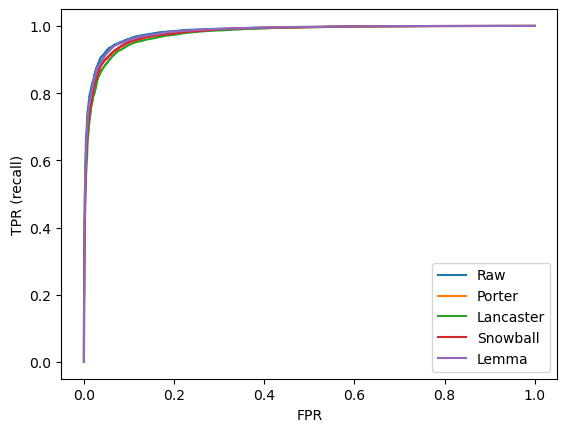

In [24]:
from sklearn.metrics import roc_curve

lr = LogisticRegression(max_iter=10000)
y_train_e = lr.fit(tf_vect, y_train)
fpr_rt, tpr_rf, thresholds_rf = roc_curve(y_train, lr.predict_proba(tf_vect)[:, 1])

y_train_porter = lr.fit(porter_vect_tf, y_train)
fpr_porter, tpr_porter, thresholds_porter = roc_curve(y_train, lr.predict_proba(porter_vect_tf)[:, 1])

y_train_lanc = lr.fit(lancaster_vect_tf, y_train)
fpr_lanc, tpr_lanc, thresholds_lanc = roc_curve(y_train, lr.predict_proba(lancaster_vect_tf)[:, 1])

y_train_snow = lr.fit(snowball_vect_tf, y_train)
fpr_snow, tpr_snow, thresholds_snow = roc_curve(y_train, lr.predict_proba(snowball_vect_tf)[:, 1])

y_train_lemma = lr.fit(lemma_vect_tf, y_train)
fpr_lemma, tpr_lemma, thresholds_lemma = roc_curve(y_train, lr.predict_proba(lemma_vect_tf)[:, 1])

plt.plot(fpr_rt, tpr_rf, label="Sem stemming")
plt.plot(fpr_porter, tpr_porter, label="Porter")
plt.plot(fpr_lanc, tpr_lanc, label="Lancaster")
plt.plot(fpr_snow, tpr_snow, label="Snowball")
plt.plot(fpr_lemma, tpr_lemma, label="Lemma")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend()


Text(0, 0.5, 'TPR (recall)')

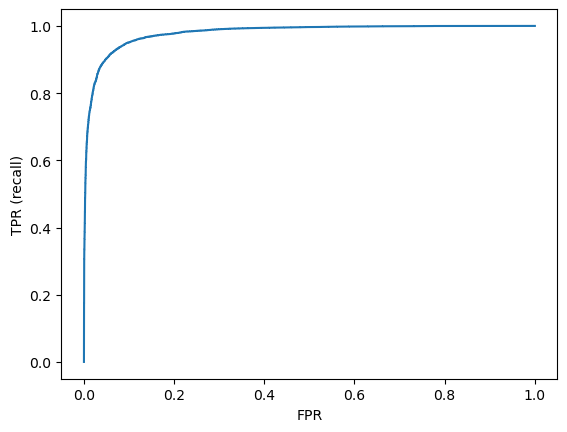

In [26]:
lr = LogisticRegression(max_iter=10000)
y_train_e = lr.fit(porter_vect_tf, y_train)

fpr_rt, tpr_rf, thresholds_rf = roc_curve(y_train, lr.predict_proba(porter_vect_tf)[:, 1])

plt.plot(fpr_rt, tpr_rf, label="Logistic Regression")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

In [27]:
pipe = make_pipeline(TfidfVectorizer(), LogisticRegression())

param_grid = {'tfidfvectorizer__min_df': [2, 4, 6, 8, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: \n{}".format(grid.best_params_))

c:\Users\anaso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\anaso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best cross-validation score: 0.89
Best parameters: 
{'tfidfvectorizer__min_df': 2}


In [ ]:
# Gráfico

In [37]:
pipe = make_pipeline(TfidfVectorizer(), LogisticRegression())

param_grid = {'tfidfvectorizer__min_df': [2, 3, 4, 5, 6, 7, 8, 9, 10], 
            'tfidfvectorizer__max_df': [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: \n{}".format(grid.best_params_))

c:\Users\anaso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\anaso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best cross-validation score: 0.89
Best parameters: 
{'tfidfvectorizer__max_df': 0.95, 'tfidfvectorizer__min_df': 5}


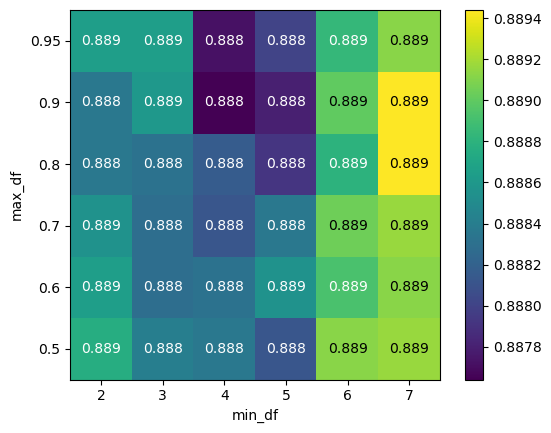

In [38]:
# Gráfico
scores = grid.cv_results_['mean_test_score'].reshape(-1, 9).T
heatmap = mglearn.tools.heatmap(
    scores, xlabel="min_df", ylabel="max_df", cmap="viridis", fmt="%.3f", 
    xticklabels=param_grid["tfidfvectorizer__min_df"], 
    yticklabels=param_grid["tfidfvectorizer__max_df"]
)
plt.colorbar(heatmap)

In [30]:
pipe = make_pipeline(TfidfVectorizer(), LogisticRegression())

param_grid = {'tfidfvectorizer__min_df': [2, 4, 6, 8, 10], 
                'tfidfvectorizer__max_df': [2, 4, 6, 8, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(docs_porter, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: \n{}".format(grid.best_params_))

c:\Users\anaso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\anaso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\anaso\anaconda3\lib\site-packages\sklearn\pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\anaso\anaconda3\lib\site-packages\sklearn\pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Users\anaso\anacon

Best cross-validation score: 0.64
Best parameters: 
{'tfidfvectorizer__max_df': 10, 'tfidfvectorizer__min_df': 2}


In [31]:
pipe = make_pipeline(TfidfVectorizer(), LogisticRegression())

param_grid = {'tfidfvectorizer__min_df': [2, 4, 6, 8, 10], 
                'tfidfvectorizer__max_df': [2, 4, 6, 8, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(docs_lancaster, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: \n{}".format(grid.best_params_))

c:\Users\anaso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\anaso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\anaso\anaconda3\lib\site-packages\sklearn\pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\anaso\anaconda3\lib\site-packages\sklearn\pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Users\anaso\anacon

Best cross-validation score: 0.63
Best parameters: 
{'tfidfvectorizer__max_df': 10, 'tfidfvectorizer__min_df': 2}


In [32]:
pipe = make_pipeline(TfidfVectorizer(), LogisticRegression())

param_grid = {'tfidfvectorizer__min_df': [2, 4, 6, 8, 10], 
                'tfidfvectorizer__max_df': [2, 4, 6, 8, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(docs_snowball, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: \n{}".format(grid.best_params_))

c:\Users\anaso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\anaso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\anaso\anaconda3\lib\site-packages\sklearn\pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\anaso\anaconda3\lib\site-packages\sklearn\pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Users\anaso\anacon

Best cross-validation score: 0.64
Best parameters: 
{'tfidfvectorizer__max_df': 10, 'tfidfvectorizer__min_df': 2}


In [33]:
pipe = make_pipeline(TfidfVectorizer(), LogisticRegression())

param_grid = {'tfidfvectorizer__min_df': [2, 4, 6, 8, 10], 
                'tfidfvectorizer__max_df': [2, 4, 6, 8, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(docs_lemma, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: \n{}".format(grid.best_params_))

c:\Users\anaso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\anaso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\anaso\anaconda3\lib\site-packages\sklearn\pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\anaso\anaconda3\lib\site-packages\sklearn\pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Users\anaso\anacon

Best cross-validation score: 0.65
Best parameters: 
{'tfidfvectorizer__max_df': 10, 'tfidfvectorizer__min_df': 2}


In [34]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(tf_vect, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))


Best cross-validation score: 0.89


In [ ]:
grid.best_params_

{'C': 10}

In [35]:
print(type(lemma_vect_tf), lemma_vect_tf.shape)
print(type(tf_vect), tf_vect.shape)
print(type(porter_vect_tf), porter_vect_tf.shape)
print(type(lancaster_vect_tf), lancaster_vect_tf.shape)
print(type(snowball_vect_tf), snowball_vect_tf.shape)

<class 'scipy.sparse.csr.csr_matrix'> (25000, 67119)
<class 'scipy.sparse.csr.csr_matrix'> (25000, 74794)
<class 'scipy.sparse.csr.csr_matrix'> (25000, 51286)
<class 'scipy.sparse.csr.csr_matrix'> (25000, 41858)
<class 'scipy.sparse.csr.csr_matrix'> (25000, 50650)


In [36]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(lemma_vect_tf, y_train)

print("Best cross-validation score: {:.2f}".format(np.mean(grid.best_score_)))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.89
Best parameters:  {'C': 10}
